# Final Proyect: Bank Marketing Segmentation

Group Members: 
- Paola Barrea
- Nicolás Bierti del Rey
- Javier Madeiro


The increasing number of marketing campaigns over time has reduced their effect on the general public.
In addition, economic pressures and competition have led companies to invest in targeted campaigns with strict selection of contacts. This type of campaign can be improved by using Business Intelligence (BI) and Data Mining (DM) techniques.<br><br>
The data was collected from a Portuguese marketing campaign related to the subscription of bank deposits. 
The business objective is **to find a model that can explain the success of a contact, that is, if the customer signs the deposit**.<br><br>
Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.



<br><br>
The dataset was obtained Kaggle: https://www.kaggle.com/dhirajnirne/bank-marketing

## Data Acquisition

### Importing libraries

In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [228]:
import phik

### Importing csv files

#### Dicctionary: bank_marketing_data.csv

<span style='color:orange'>**Personal information**<br></span>
**age**<br>
**age group**<br>
**eligible:** variable base in personal information<br>
**job:** type of job <br>
**salary**<br>
**marital**<br>
**education:** level of education completed <br>
**marital-education:** combination of previous columns<br>
**targeted:** variable base in personal information. Rename: **tag**<br>
<span style='color:orange'>**Financial information**<br></span>
**default:** has unpayed credit? <br>
**balance:** remaining balance in the account <br>
**housing:** has housing loan? <br>
**loan:** has previous loan?<br>
<span style='color:orange'>**Last contact information**<br></span>
**contact:** communication type <br>
**day:** day of the month <br>
**month** <br>
**duration:** in seconds, if equal to 0 target will be 'False' <br>
**campaign:** number of contacts preformed in this campaign for this client <br>
<span style='color:orange'>**Previous campaing info**<br></span>
**pdays:** number of days pass since last contact in previous campaing, 999 equals 'no contact'. Rename: **pcampign**<br>
**previous:**  number of contacts preformed in previous campaing for this client <br>
**poutcome:** outcome of the previous marketing campaign<br>
<span style='color:orange'>**Target**<br></span>
**y:** has the client subscribed?, equal to 'response'<br>
**response** rename **outcome**

In [229]:
bank_df = pd.read_csv("bank_marketing_data.csv")
bank_df.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


In [230]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

Observations:
- The variables are numeric integer & categorical.
- There's columns with binary values.
- None null values

### Renaming columns

In [231]:
bank_df.rename(columns={'age group':'age_group','targeted':'tag','previous':'pcampaign','response':'outcome'},inplace=True)
bank_df.head()

,age,age_group,eligible,job,salary,marital,education,marital-education,tag,default,...,contact,day,month,duration,campaign,pdays,pcampaign,poutcome,y,outcome
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


## Columns selection

## Machine Learning

In [232]:
bank_df.head()

,age,age_group,eligible,job,salary,marital,education,marital-education,tag,default,...,contact,day,month,duration,campaign,pdays,pcampaign,poutcome,y,outcome
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


In [233]:
df_for_tree = bank_df.drop(['age','job','salary','eligible','tag','marital-education','marital','education','pcampaign','y','day'],axis=1)
df_for_tree.head()

,age_group,default,balance,housing,loan,contact,month,duration,campaign,pdays,poutcome,outcome
0,5,no,2143,yes,no,unknown,may,261,1,-1,unknown,0
1,4,no,29,yes,no,unknown,may,151,1,-1,unknown,0
2,3,no,2,yes,yes,unknown,may,76,1,-1,unknown,0
3,4,no,1506,yes,no,unknown,may,92,1,-1,unknown,0
4,3,no,1,no,no,unknown,may,198,1,-1,unknown,0


In [234]:
df_for_model = pd.get_dummies(df_for_tree, drop_first=True)
df_for_model.columns

Index(['age_group', 'balance', 'duration', 'campaign', 'pdays', 'outcome',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [235]:
df_for_model

,age_group,balance,duration,campaign,pdays,outcome,default_yes,housing_yes,loan_yes,contact_telephone,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,5,2143,261,1,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,4,29,151,1,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3,2,76,1,-1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,4,1506,92,1,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3,1,198,1,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,5,825,977,3,-1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,7,1729,456,2,-1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,7,5715,1127,5,184,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,5,668,508,4,-1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [236]:
#Separamos los datos de entrada de la salida
X = df_for_model.drop('outcome', axis=1) #Elimino de mi dataset la variable a predecir
y = df_for_model['outcome'] #Defino el Target

In [237]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 

In [238]:
from sklearn.tree import DecisionTreeClassifier #Importing the model
dec_tree = DecisionTreeClassifier(max_depth= 3, random_state = 1) #Creating the model

In [239]:
#Fitting the model
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

Visualizing the Model

In [240]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import sklearn.metrics as skm

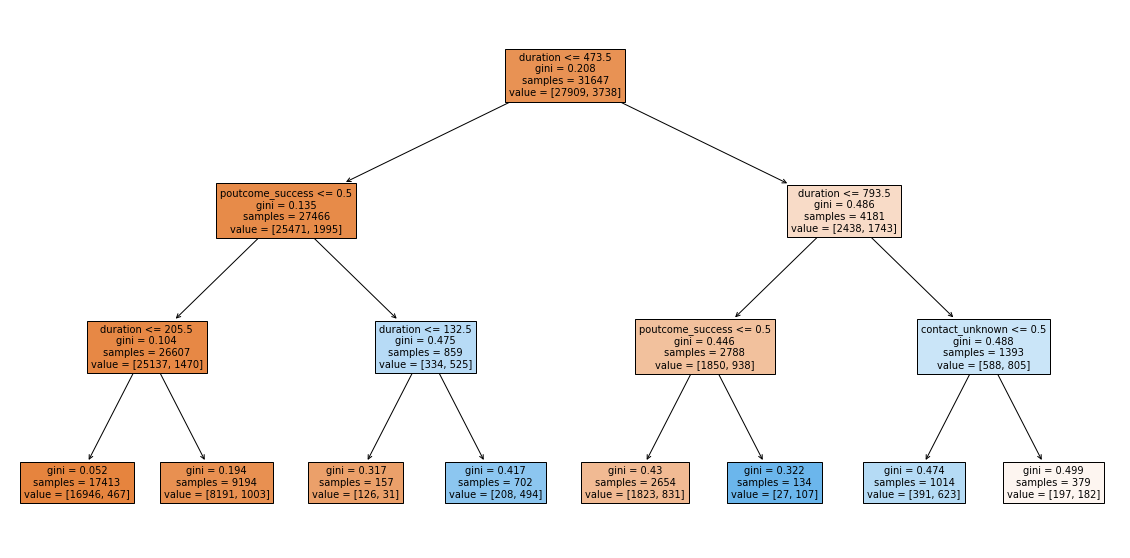

In [241]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree=dec_tree, feature_names=X_train.columns, filled=True);

This means that:

- there will be clients with whom we will contact because the model has predicted that they would accept and in reality they do not buy the product (False Positive [FP], False Positives).
- there will also be clients with whom we will not contact because the model has predicted that they would not accept but in reality they would buy it (False Negative [FN], False Negatives).
- there will be clients with whom we will contact because the model has predicted that they would accept and in fact they do buy the product (True Positive [TP], True Positives).
- there will be clients that we will not contact because the model has predicted that they would not accept the offer and in reality they do not accept it (True Negative [TN], True Negatives).

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



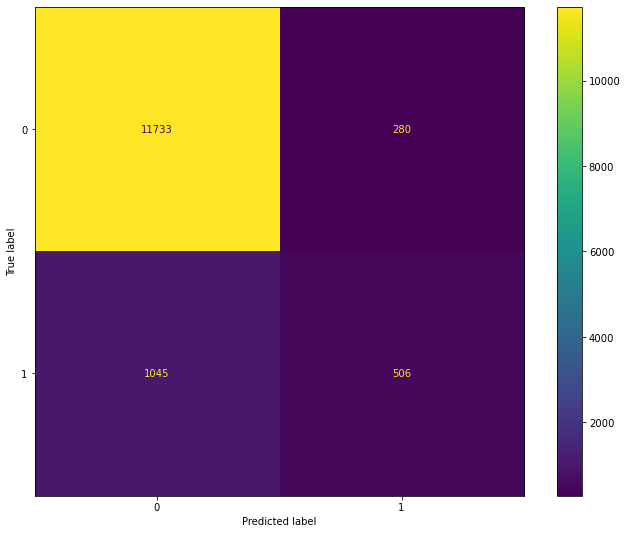

In [242]:
skm.plot_confusion_matrix(dec_tree, X_test, y_test)

In [243]:
y_train_pred = dec_tree.predict(X_train) #Train prediction
y_test_pred = dec_tree.predict(X_test) #Test prediction

In [244]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9007804847220906
% de aciertos sobre el set de evaluación: 0.9023149513417871


C:\Users\Nico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



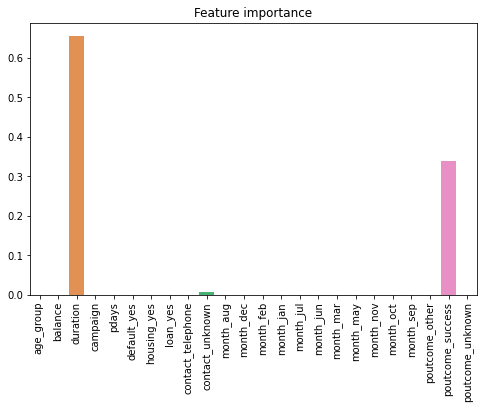

In [245]:
plt.figure(figsize=(8,5))
importances = dec_tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Feature importance')
plt.xticks(rotation = 90)
plt.show();

In [246]:
#Recall in Train
train_recall = skm.recall_score(y_train, y_train_pred)

#Recall in Test
test_recall = skm.recall_score(y_test, y_test_pred)

print('% of correct positive predictions according to the truth in training set:', train_recall)
print('% of correct positive predictions according to the truth in test set:',test_recall)

% of correct positive predictions according to the truth in training set: 0.3274478330658106
% of correct positive predictions according to the truth in test set: 0.3262411347517731


In [247]:
#f1 in Train
train_f1 = skm.f1_score(y_train, y_train_pred)

#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_pred)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

Indicator of incorrect predictions in training set: 0.43808160343593416
Indicator of incorrect predictions in testing set: 0.4330338040222508


## Desafio 39

In [248]:
df_for_model

,age_group,balance,duration,campaign,pdays,outcome,default_yes,housing_yes,loan_yes,contact_telephone,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,5,2143,261,1,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,4,29,151,1,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3,2,76,1,-1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,4,1506,92,1,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3,1,198,1,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,5,825,977,3,-1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,7,1729,456,2,-1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,7,5715,1127,5,184,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,5,668,508,4,-1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [249]:
y.value_counts()

0    39922
1     5289
Name: outcome, dtype: int64

La data esta desbalanceada, sera necesario aplicar SMOTE en el futuro

In [250]:
# Separamos los datos de entrada de la salida
X = df_for_model.drop('outcome', axis=1) #Elimino de mi dataset la variable a predecir
y = df_for_model['outcome'] #Defino el Target

### Random Forest

In [251]:
from sklearn.ensemble import RandomForestClassifier

La metrica accuracy no funciona bien cuando las clases están desbalanceadas como es en este caso. UsaremosF1 score

In [252]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Separamos en train y test!
# Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=1,
                                                    stratify=y) 

In [253]:
#Creamos un random forest!
forest = RandomForestClassifier(random_state=1,
                               n_estimators=200,
                               class_weight="balanced", 
                               max_features="log2",
                               max_depth=None)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train) #Prediccion en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de evaluación:',train_accuracy)

y_test_pred = forest.predict(X_test) #Prediccion en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 1.0
% de aciertos sobre el set de evaluación: 0.9023886759068122


In [254]:
#f1 in Train
train_f1 = skm.f1_score(y_train, y_train_pred)

#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_pred)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

Indicator of incorrect predictions in training set: 1.0
Indicator of incorrect predictions in testing set: 0.4938837920489296


Comparado con la resolulcion del DecisionTreeClassifier respecto al testing set, la mejora es minima
- 0.4634 DecisionTreeClassifier
- 0.4330 Random Forest


###  KNN

In [255]:
from sklearn.neighbors import KNeighborsClassifier

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=1,
                                                    stratify=y) 

In [257]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [258]:
knn.predict(X_test)[0:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [259]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.8740784429371866

###  Regresion Logistica

In [260]:
#Entrenamos un modelo de regresión logística

# Paso 3: importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression

# Paso 4: Creamos una instancia de la Regresión Logística
log_regression = LogisticRegression()

# Paso 5: Entrenamos la regresión logística con los datos de entrenamiento
log_regression.fit(X_train,y_train);

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [261]:
y_pred=log_regression.predict(X_test)

In [262]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11717,   260],
       [ 1148,   439]], dtype=int64)

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



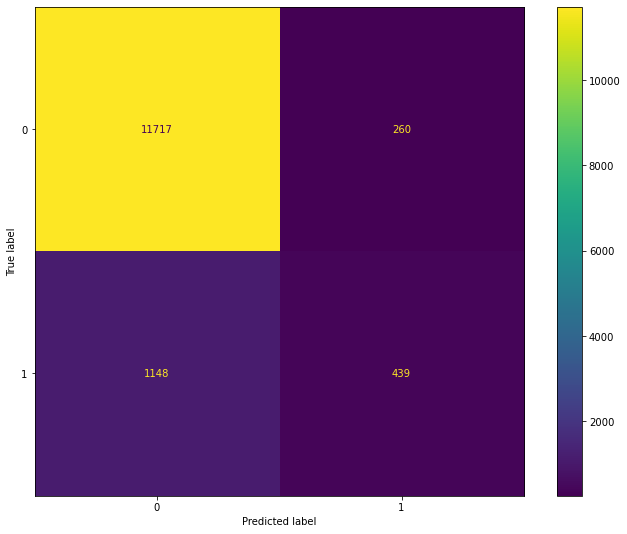

In [263]:
skm.plot_confusion_matrix(log_regression, X_test, y_test);

In [264]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8961958124447066
Precision: 0.6280400572246065
Recall: 0.27662255828607435


- Precision: it gives us the quality of the prediction: what percentage of those that we have said are the positive class, actually are? When our Logistic Regression model predicted tha people will buy the product (could be an investment fund) from the bank, 62% the model will give us a right answer.



- Recall: If there are people that will buy the product from the bank the model can identify it only 28% of the time 

### ROC CURVE

In [265]:
from sklearn.metrics import plot_roc_curve

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



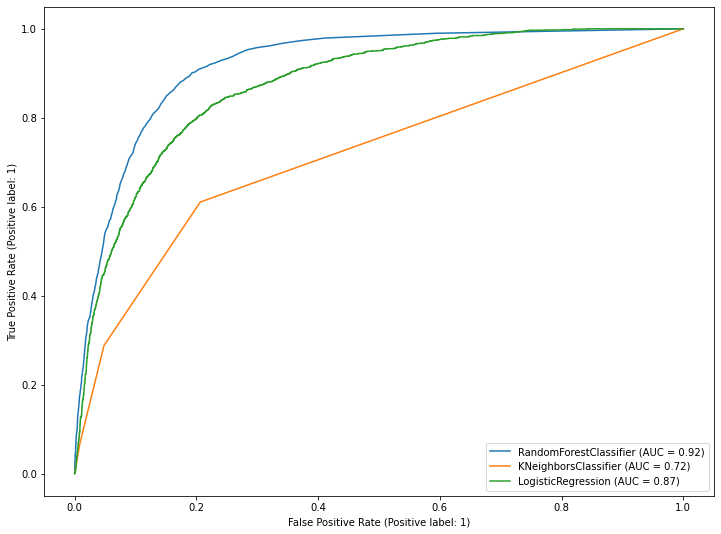

In [266]:
disp = plot_roc_curve(forest, X_test, y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_);
plot_roc_curve(log_regression, X_test, y_test, ax=disp.ax_);